In [2]:
pip install pystan==2.19.1.1

In [3]:
pip install prophet

     |████████████████████████████████| 65 kB 2.2 MB/s 
     |████████████████████████████████| 49 kB 4.0 MB/s 
     |████████████████████████████████| 179 kB 9.5 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640490 sha256=123d0fe2f25d461e46559224f3f445dcbf987990db9861d13067f00e06f5eb5b
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [6]:
import pandas as pd
from prophet import Prophet

from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [7]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [8]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.200924,7.499354,8.911350
3266,2017-01-16,8.525932,7.756308,9.213357
3267,2017-01-17,8.313330,7.594324,9.054815
3268,2017-01-18,8.145923,7.438240,8.862854
3269,2017-01-19,8.157831,7.406492,8.852687


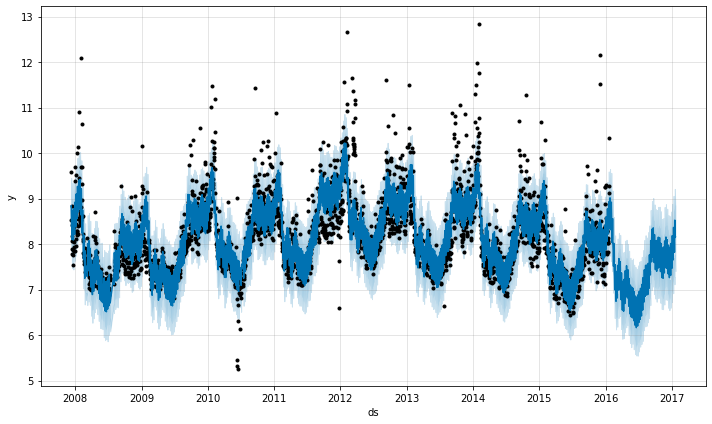

In [12]:
fig1 = m.plot(forecast)

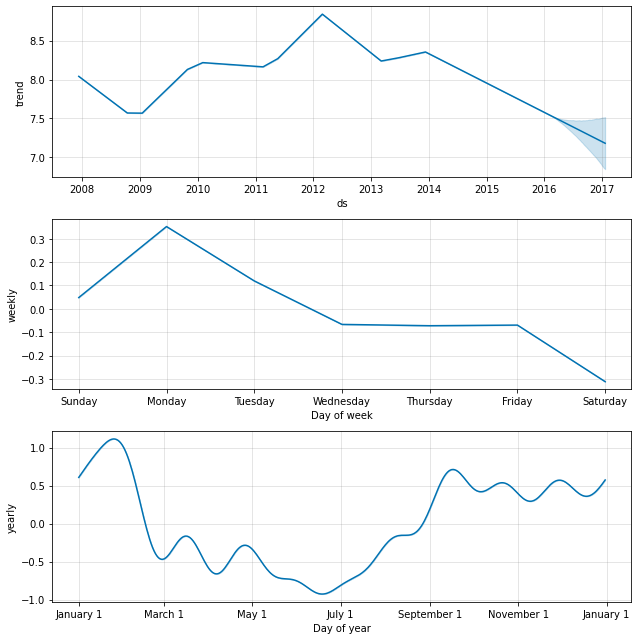

In [13]:
fig2 = m.plot_components(forecast)

In [14]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [15]:
plot_components_plotly(m, forecast)